In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [15]:
print(model.feature_importances_)

[0.20248031 0.07752443 0.24654848 0.09223242 0.08942456 0.19806011
 0.05312717 0.04060251]


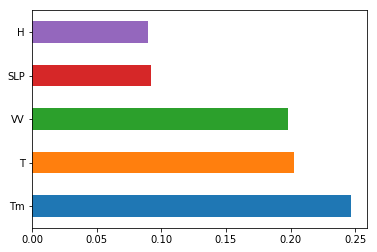

In [16]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### ANN

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


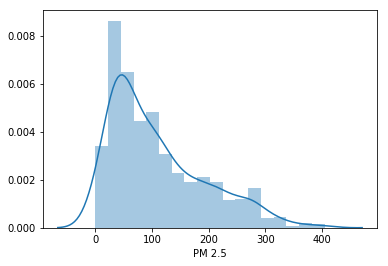

In [17]:
sns.distplot(y)

### Train Test split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 511 samples, validate on 253 samples
Epoch 1/100
511/511 [==============================] - 1s 2ms/step - loss: 78.4151 - mean_absolute_error: 78.4151 - val_loss: 46.2893 - val_mean_absolute_error: 46.2893
Epoch 2/100
511/511 [==============================] - 0s 315us/step - loss: 42.1976 - mean_absolute_error: 42.1976 - val_loss: 46.5331 - val_mean_absolute_error: 46.5331
Epoch 3/100
511/511 [==============================] - 0s 370us/step - loss: 38.0474 - mean_absolute_error: 38.0474 - val_loss: 45.2934 - val_mean_absolute_error: 45.2934
Epoch 4/100
511/511 [==============================] - 0s 360us/step - loss: 37.5284 - mean_absolute_error: 37.5284 - val_loss: 43.1351 - val_mean_absolute_error: 43.1351
Epoch 5/100
511/511 [==============================] - 0s 364us/step - loss: 36.8904 - mean_absolute_error: 36.8904 - val_loss: 43.9518 - val_mean_absolute_error: 43.9518
Epoch 6/100
511/511 [==============================] - 0s 350us/step - loss: 36.6624 - mean_absolute_

Epoch 96/100
511/511 [==============================] - 0s 472us/step - loss: 24.0659 - mean_absolute_error: 24.0659 - val_loss: 34.6281 - val_mean_absolute_error: 34.6281
Epoch 97/100
511/511 [==============================] - 0s 470us/step - loss: 24.5521 - mean_absolute_error: 24.5521 - val_loss: 31.8978 - val_mean_absolute_error: 31.8978
Epoch 98/100
511/511 [==============================] - 0s 464us/step - loss: 23.4737 - mean_absolute_error: 23.4737 - val_loss: 35.5966 - val_mean_absolute_error: 35.5966
Epoch 99/100
511/511 [==============================] - 0s 487us/step - loss: 25.5242 - mean_absolute_error: 25.5242 - val_loss: 33.7538 - val_mean_absolute_error: 33.7538
Epoch 100/100
511/511 [==============================] - 0s 472us/step - loss: 23.3116 - mean_absolute_error: 23.3116 - val_loss: 33.2666 - val_mean_absolute_error: 33.2666


#### Model Evaluation

In [18]:
prediction=NN_model.predict(X_test)

In [26]:
y_test

pandas.core.series.Series

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


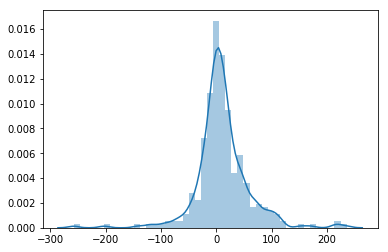

In [27]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

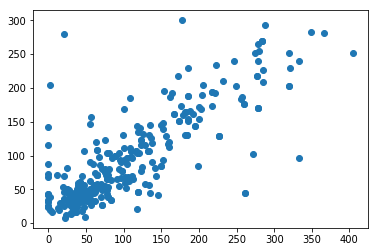

In [28]:
plt.scatter(y_test,prediction)

In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 31.87020421483652
MSE: 2491.6508633001677
RMSE: 49.91643880827405


In [50]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24.65656370121214
MSE: 1677.0750087767076
RMSE: 40.95210628010124


# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 25.245581808943093
MSE: 1681.8142776645072
RMSE: 41.009929013161035


In [117]:
import pickle 

In [52]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)